# Neural Network Activity

In [163]:
import numpy as np
import pandas as pd

mydata = pd.read_csv("/Users/jaredmcmullen/Desktop/GSB-S545/data/penguins_size.csv")
mydata

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [164]:
mydata = mydata.dropna()
mydata

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [171]:
from sklearn.preprocessing import LabelEncoder

#Use label encoder to get in the model ingesting format
for label in mydata.columns:
    mydata[label] = LabelEncoder().fit(mydata[label]).transform(mydata[label])

#Set X and Y values for the models
Y = mydata['species']
X = mydata.drop(['species'],axis=1)
print("X", "----------------------")
X
print("Y", "----------------------")
Y

array([['Torgersen', 39.1, 18.7, 181.0, 3750.0],
       ['Torgersen', 39.5, 17.4, 186.0, 3800.0],
       ['Torgersen', 40.3, 18.0, 195.0, 3250.0],
       ...,
       ['Biscoe', 50.4, 15.7, 222.0, 5750.0],
       ['Biscoe', 45.2, 14.8, 212.0, 5200.0],
       ['Biscoe', 49.9, 16.1, 213.0, 5400.0]], dtype=object)

In [71]:
#Create a function to get an accuracy score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

#Create a function to iterate through different models
def evaluate_model(model, X, Y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

## Preliminary NN Model - Data not scaled

In [99]:
from sklearn.neural_network import MLPClassifier

def get_models():
    models = dict()
    models['nn_basic'] = MLPClassifier()
    return models

models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>nn_basic 0.993 (0.013)


## Preliminary NN Model - Data scaled

In [118]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

#Set up new function to scale the x data
def evaluate_model(model, X, Y):
    scaler.fit(X)
    X_scaled = scaler.transform(X)  
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [135]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

def get_models():
    models = dict()
    models['nn_basic'] = MLPClassifier()
    return models

models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>nn_basic 0.993 (0.013)


We can conclude that scaled data performs slightly better than non scaled data. This is a very slight different though. 

## Use Grid Search to determine the best model

In [104]:
from sklearn.model_selection import GridSearchCV
model = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu', 'identity', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}


clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'identity', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam']})

In [107]:
final_model = clf.best_params_
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}


## Final Model Yield the best results

In [137]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

final_model = MLPClassifier(activation = 'identity', alpha = .05, hidden_layer_sizes = (100,), learning_rate = 'adaptive', solver = 'adam')

def get_models():
    models = dict()
    models['nn_basic'] = final_model
    return models

models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>nn_basic 0.994 (0.012)


## Test on a non NN model

In [139]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier


def get_models():
    models = dict()
    models['xg_basic'] = XGBClassifier()
    return models

models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>xg_basic 0.988 (0.020)


We can see that this accuracy is far lower than the NN accuracy 

While this gives us the best accuracy, lets dig a little further on some more parameters. 

## Explore Solver

In [162]:
final_model1 = MLPClassifier(activation = 'identity', alpha = .05, hidden_layer_sizes = (100, 20), learning_rate = 'adaptive', solver = 'lbfgs')
final_model2 = MLPClassifier(activation = 'identity', alpha = .05, hidden_layer_sizes = (100,), learning_rate = 'adaptive', solver = 'sgd')

def get_models():
    models = dict()
    models['nn_basic1'] = final_model1
    models['nn_basic2'] = final_model2
    return models

models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>nn_basic1 0.998 (0.008)
>nn_basic2 0.988 (0.015)


## Explore Hidden Layer Size

In [157]:
final_model1 = MLPClassifier(activation = 'identity', alpha = .05, hidden_layer_sizes = (50,), learning_rate = 'adaptive', solver = 'adam')
final_model2 = MLPClassifier(activation = 'identity', alpha = .05, hidden_layer_sizes = (300,50, 30), learning_rate = 'adaptive', solver = 'adam')

def get_models():
    models = dict()
    models['nn_basic1'] = final_model1
    models['nn_basic2'] = final_model2
    return models

models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>nn_basic1 0.994 (0.012)
>nn_basic2 0.997 (0.009)


## Activation

In [159]:
final_model1 = MLPClassifier(activation = 'logistic', alpha = .05, hidden_layer_sizes = (300,50, 30), learning_rate = 'adaptive', solver = 'adam')
final_model2 = MLPClassifier(activation = 'tanh', alpha = .05, hidden_layer_sizes = (300,50, 30), learning_rate = 'adaptive', solver = 'adam')

def get_models():
    models = dict()
    models['nn_basic1'] = final_model1
    models['nn_basic2'] = final_model2
    return models

models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>nn_basic1 0.996 (0.010)
>nn_basic2 0.997 (0.009)


## Shuffle

In [160]:
final_model1 = MLPClassifier(activation = 'logistic', shuffle = True, alpha = .05, hidden_layer_sizes = (300,50, 30), learning_rate = 'adaptive', solver = 'adam')
final_model2 = MLPClassifier(activation = 'tanh', shuffle = False, alpha = .05, hidden_layer_sizes = (300,50, 30), learning_rate = 'adaptive', solver = 'adam')

def get_models():
    models = dict()
    models['nn_basic1'] = final_model1
    models['nn_basic2'] = final_model2
    return models

models = get_models()

#Iterate through the models and append the scores
from matplotlib import pyplot
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>nn_basic1 0.996 (0.010)
>nn_basic2 0.993 (0.013)


## Below Is the picture of the neural network that yielded the highest accuracy

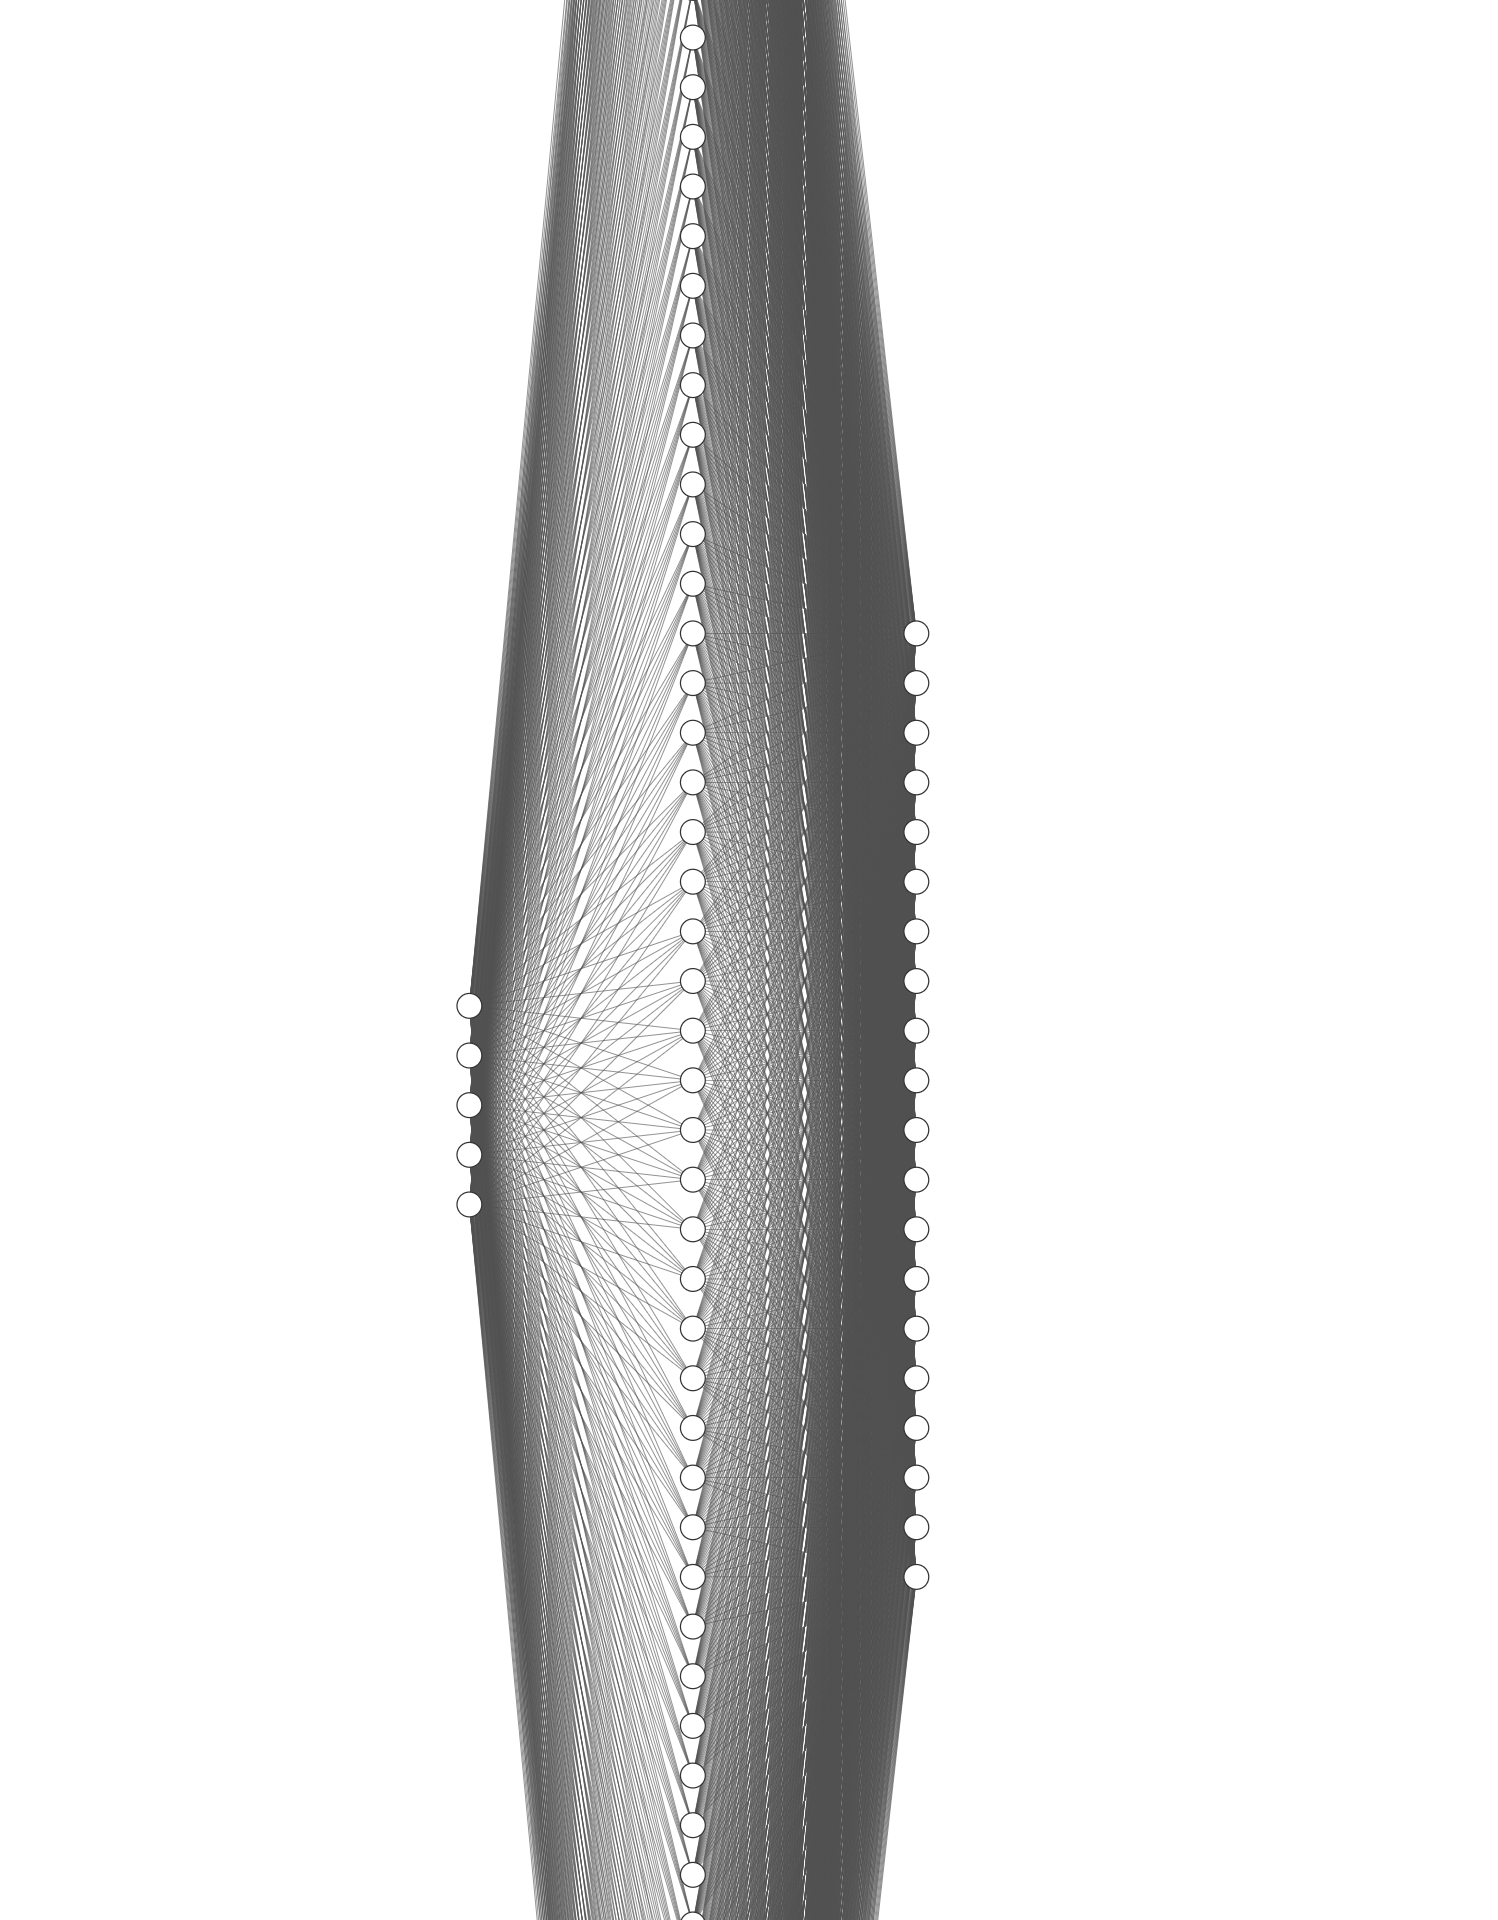

It has 5 input nodes, one 100 node long hidden layer, and a 20 node output layer.